In [1]:
#Importar Librerias para el eda
import pandas as pd
import numpy as np

#Librerias de visualización
import matplotlib.pyplot as plt
import seaborn as sns

##Guardamos el modelo y el transformer
import joblib

In [2]:
## Escalar los datos, para ejecutar el StandardScaler y el MinMax Scaler y verificar si tenemos los mejores resultados usando el escalado
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
#Algoritmos
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

#Métricas de sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [4]:
## Optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
import multiprocessing
from multiprocessing import Pool
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# Estrategia para hacer split
from sklearn.model_selection import train_test_split

#Estrategia de balanceo: oversampling
from pylab import rcParams
from imblearn.over_sampling import RandomOverSampler
 
from collections import Counter



In [5]:
# Configuración warnings
import warnings
warnings.filterwarnings('once')

## Leer dataset

In [6]:
path = '/content/stroke_dataset.csv'
df = pd.read_csv(path)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# **EDA**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [8]:
df["work_type"].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

## Tipos de opciones por columna

In [9]:
for col in ["work_type", "Residence_type", "smoking_status"]:
    print(f"Valores en '{col}':")
    for i in df[col].unique():
        print("\t"+str(i))
    print()

Valores en 'work_type':
	Private
	Self-employed
	Govt_job
	children

Valores en 'Residence_type':
	Urban
	Rural

Valores en 'smoking_status':
	formerly smoked
	never smoked
	smokes
	Unknown



## Datos nulos

In [10]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Veamos de cuantas filas tenemos y cuantas hay :

In [11]:
print(df.shape)
print(pd.value_counts(df['stroke'], sort = True))

(4981, 11)
0    4733
1     248
Name: stroke, dtype: int64


## Boxplot para ver outliers

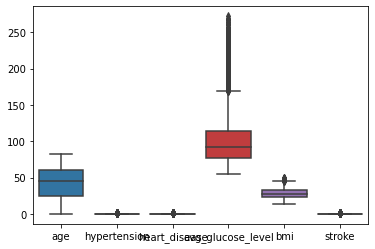

In [12]:
sns.boxplot(data=df)

## Scatterplots para aclarar variables predictoras más importantes

### La variable predictora más importante en nuestro dataset es la edad. Cuando observamos nuestra variable de edad, podemos ver que sólo a partir de los 40 años la gente empieza a tener Ictus, y los casos por debajo de esa edad son muy raros. La tendencia es que cuanto mayor es la persona, más probable es que tenga un Ictus

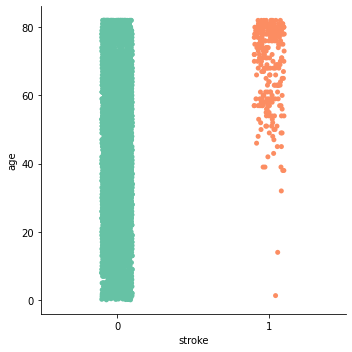

In [13]:
sns.catplot(x = "stroke", y = "age", palette = "Set2", data = df)

### El rango de glucosa concentrado esta en el rango de 60 a 120

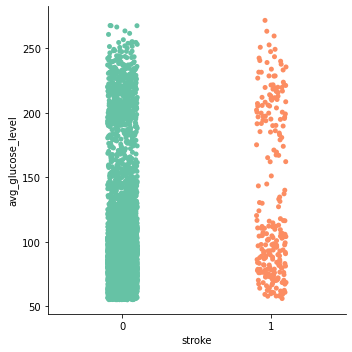

In [14]:
sns.catplot(x = "stroke", y = "avg_glucose_level", palette = "Set2", data = df)

### Si miramos el BMI podemos ver que es más común que la gente tenga un accidente cerebrovascular cuando el BMI está en la media, ni muy alto ni muy bajo.

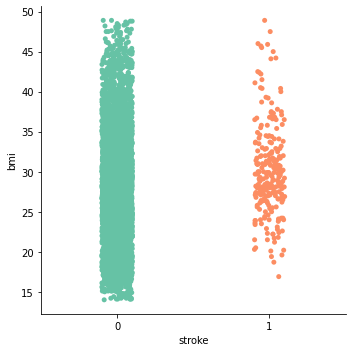

In [15]:
sns.catplot(x = "stroke", y = "bmi", palette = "Set2", data = df)

In [16]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


# Preparación del modelo

## Separamos las variables predictorasy la objetivo

In [17]:
X = df.drop("stroke", axis = 1)
y = df["stroke"]

In [18]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

## Transformamos

### Definimos tipos de variables

In [20]:
categoricas = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
numericas = ["age", "avg_glucose_level", "bmi"]
binarias = ["hypertension", "heart_disease"]

In [21]:
transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_numerico, transformer_categorico], remainder="passthrough")

In [22]:
X = transformer.fit_transform(X)

In [23]:
pd.DataFrame(X, columns = transformer.get_feature_names_out())

,transformer_numerico__age,transformer_numerico__avg_glucose_level,transformer_numerico__bmi,transformer_categorico__gender_Female,transformer_categorico__gender_Male,transformer_categorico__ever_married_No,transformer_categorico__ever_married_Yes,transformer_categorico__work_type_Govt_job,transformer_categorico__work_type_Private,transformer_categorico__work_type_Self-employed,transformer_categorico__work_type_children,transformer_categorico__Residence_type_Rural,transformer_categorico__Residence_type_Urban,transformer_categorico__smoking_status_Unknown,transformer_categorico__smoking_status_formerly smoked,transformer_categorico__smoking_status_never smoked,transformer_categorico__smoking_status_smokes,remainder__hypertension,remainder__heart_disease
0,0.816895,0.801265,0.647564,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.975586,0.234512,0.530086,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.597168,0.536008,0.584527,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.963379,0.549349,0.286533,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.987793,0.605161,0.429799,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.499512,0.069384,0.452722,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4977,0.487305,0.627966,0.489971,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4978,0.548340,0.184194,0.510029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4979,0.487305,0.133044,0.458453,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
transformer.output_indices_

{'transformer_numerico': slice(0, 3, None),
 'transformer_categorico': slice(3, 17, None),
 'remainder': slice(17, 19, None)}

# **ENTRENAR**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [26]:
def train_evaluate(nombre_modelo, modelo):
    mod = modelo()
    mod.fit(X_train, y_train)
    
    y_predict = mod.predict(X_test)
    #accuracy del modelo
    acc = accuracy_score(y_test, y_predict)
    #overfitting
    y_pred_train = mod.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    
    print(nombre_modelo)
    print()
    
    print(f"Accuaracy: {acc}")
    print(f"Accuaracy_train: {acc_train}")
    print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
    print("Precision:", precision_score(y_test, y_predict))
    print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
    print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
    print( "precision score", precision_score(y_test, y_predict, average='macro')) 
    print( "recall score", recall_score(y_test, y_predict, average='macro'))
    print( "classification_report\n\n", classification_report(y_test, y_predict))   

    #Generamos la matriz de confusión
    cnf_matrix = confusion_matrix(y_test, y_predict)
    print(cnf_matrix)
    # Mapa de calor con la matriz de confusión
    print(" ")
    sns.heatmap(cnf_matrix, annot= True, fmt="g", cmap="YlGnBu")  

LGBMClassifier

Accuaracy: 0.9444816053511705
Accuaracy_train: 0.9982788296041308
Balanced_Accuracy: 0.5224527835365274
Precision: 0.23529411764705882
f1 score macro 0.5296407628246194
f1 score micro 0.9444816053511705
precision score 0.5939664092971424
recall score 0.5224527835365274
classification_report

               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1421
           1       0.24      0.05      0.09        74

    accuracy                           0.94      1495
   macro avg       0.59      0.52      0.53      1495
weighted avg       0.92      0.94      0.93      1495

[[1408   13]
 [  70    4]]
 


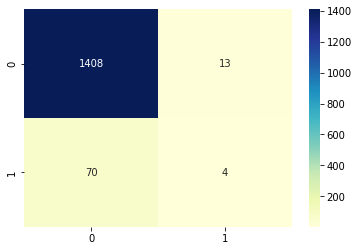

In [27]:
train_evaluate("LGBMClassifier", LGBMClassifier)

Gaussiano

Accuaracy: 0.7698996655518394
Accuaracy_train: 0.7871485943775101
Balanced_Accuracy: 0.7060263993761531
Precision: 0.12912087912087913
f1 score macro 0.5399078169508023
f1 score micro 0.7698996655518394
precision score 0.5526241000378932
recall score 0.7060263993761531
classification_report

               precision    recall  f1-score   support

           0       0.98      0.78      0.87      1421
           1       0.13      0.64      0.21        74

    accuracy                           0.77      1495
   macro avg       0.55      0.71      0.54      1495
weighted avg       0.93      0.77      0.83      1495

[[1104  317]
 [  27   47]]
 


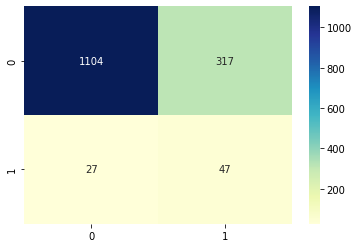

In [28]:
train_evaluate("Gaussiano", GaussianNB)

### Este algoritmo, el Gaussiano, más básico que el LGBM sería más interesante para estudios a futuros. Usaremos LGBM en este proyecto porque podemos "jugar" con él más

# **Modelos Machine Learning. Balanceo de datos**

### Después de ver varios modelos descartamos y elegimos: LGBM

# **Oversampling**

In [29]:
os = RandomOverSampler(random_state=0)   #rate = 0.5 para y_train se la mitad de X_train
X_train_os, y_train_os = os.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_os)))

Distribution before resampling Counter({0: 3312, 1: 174})
Distribution labels after resampling Counter({0: 3312, 1: 3312})


In [30]:
def train_evaluate_oversampling(nombre_modelo, modelo):
    mod = modelo()
    mod.fit(X_train_os, y_train_os)
    
    y_predict = mod.predict(X_test)
    #accuracy del modelo
    acc = accuracy_score(y_test, y_predict)
    #overfitting
    y_pred_train = mod.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    
    print(nombre_modelo)
    print()
    
    print(f"Accuaracy: {acc}")
    print(f"Accuaracy_train: {acc_train}")
    print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
    print("Precision:", precision_score(y_test, y_predict))
    print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
    print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
    print( "precision score", precision_score(y_test, y_predict, average='macro')) 
    print( "recall score", recall_score(y_test, y_predict, average='macro'))
    print( "classification_report\n\n", classification_report(y_test, y_predict))   

    #Generamos la matriz de confusión
    cnf_matrix = confusion_matrix(y_test, y_predict)
    print(cnf_matrix)
    # Mapa de calor con la matriz de confusión
    print(" ")
    sns.heatmap(cnf_matrix, annot= True, fmt="g", cmap="YlGnBu")  

LGBM

Accuaracy: 0.9117056856187291
Accuaracy_train: 0.985083189902467
Balanced_Accuracy: 0.5756652148277764
Precision: 0.17045454545454544
f1 score macro 0.5692545445020692
f1 score micro 0.9117056856187291
precision score 0.5642606771338115
recall score 0.5756652148277764
classification_report

               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1421
           1       0.17      0.20      0.19        74

    accuracy                           0.91      1495
   macro avg       0.56      0.58      0.57      1495
weighted avg       0.92      0.91      0.92      1495

[[1348   73]
 [  59   15]]
 


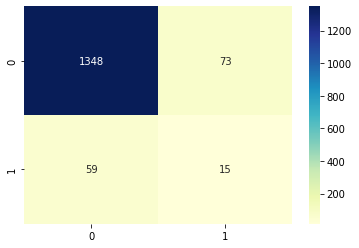

In [31]:
train_evaluate_oversampling("LGBM", LGBMClassifier)

### Mejora algo nuestro modelo LGBM con oversampling

## **Usamos hiperparámetros a nuestros modelos**

## LGBM con RandomOverSample

### LGBM con gridsearch


In [32]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'learning_rate' : [1],
              'n_estimators'  : [500],
             'num_leaves': [2], # large num_leaves helps improve accuracy but might lead to over-fitting
              'boosting_type' : ['gbdt'], # for better accuracy -> try dart
              'objective' : ['binary'],
               # large max_bin helps improve accuracy but might slow down training progress
              'colsample_bytree' : [1],
              'subsample'     : [0.5],
              'reg_alpha' : [1],
              'reg_lambda' : [2],
              'scale_pos_weight' : [191]
    }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_LGBM= GridSearchCV(
        estimator  = LGBMClassifier(),
        param_grid = param_grid,
        scoring    = 'recall',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=100, n_repeats=1), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_LGBM.fit(X = X_train_os, y = y_train_os)

# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> LGBMClassifier")
resultados = pd.DataFrame(grid_LGBM.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

# Mejores hiperparámetros por validación cruzada LGBMClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) LGBMClassifier")
print("----------------------------------------")
print(grid_LGBM.best_params_, ":", grid_LGBM.best_score_, grid_LGBM.scoring)

# Guardamos el mejor modelo
modelo_LGBM_nr = grid_LGBM.best_estimator_
#Accuracy del modelo
LGBM_accuracy_nr = grid_LGBM.best_score_


Resultados GridSearch ---->>> LGBMClassifier
----------------------------------------
Mejores hiperparámetros encontrados (cv) LGBMClassifier
----------------------------------------
{'boosting_type': 'gbdt', 'colsample_bytree': 1, 'learning_rate': 1, 'n_estimators': 500, 'num_leaves': 2, 'objective': 'binary', 'reg_alpha': 1, 'reg_lambda': 2, 'scale_pos_weight': 191, 'subsample': 0.5} : 1.0 recall


Mejores hiperparámetros encontrados (cv) LGBMClassifier
----------------------------------------
{'boosting_type': 'gbdt', 'colsample_bytree': 1, 'learning_rate': 1, 'n_estimators': 500, 'num_leaves': 2, 'objective': 'binary', 'reg_alpha': 1, 'reg_lambda': 2, 'scale_pos_weight': 191, 'subsample': 0.5} : 1.0 recall



LGBM + hyperparameters (Strategy: Oversampling)

Accuaracy: 0.5558528428093645
Accuaracy_train: 0.5671256454388984
Balanced_Accuracy: 0.7279323658634004
Precision: 0.09366391184573003
f1 score macro 0.4334018264840183
f1 score micro 0.5558528428093645
precision score 0.5429307855717597
recall score 0.7279323658634004
classification_report

               precision    recall  f1-score   support

           0       0.99      0.54      0.70      1421
           1       0.09      0.92      0.17        74

    accuracy                           0.56      1495
   macro avg       0.54      0.73      0.43      1495
weighted avg       0.95      0.56      0.67      1495

[[763 658]
 [  6  68]]
 


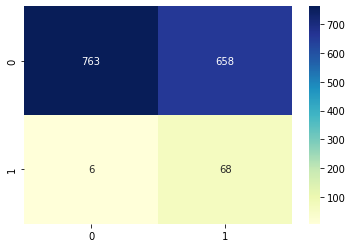

In [33]:
    mod = modelo_LGBM_nr
    #mod.fit(X_train_os, y_train_os)
    
    y_predict = mod.predict(X_test)
    #accuracy del modelo
    acc = accuracy_score(y_test, y_predict)
    #overfitting
    y_pred_train = mod.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    
    print("LGBM + hyperparameters (Strategy: Oversampling)")
    print()
    
    print(f"Accuaracy: {acc}")
    print(f"Accuaracy_train: {acc_train}")
    print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
    print("Precision:", precision_score(y_test, y_predict))
    print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
    print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
    print( "precision score", precision_score(y_test, y_predict, average='macro')) 
    print( "recall score", recall_score(y_test, y_predict, average='macro'))
    print( "classification_report\n\n", classification_report(y_test, y_predict))   

    #Generamos la matriz de confusión
    cnf_matrix = confusion_matrix(y_test, y_predict)
    print(cnf_matrix)
    # Mapa de calor con la matriz de confusión
    print(" ")
    sns.heatmap(cnf_matrix, annot= True, fmt="g", cmap="YlGnBu")  

### LGBM con Random Search

In [34]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_LGBM_randm = {
              'n_estimators'  : sp_randInt(100, 1000),
              'max_depth'     : sp_randInt(4, 10),
              'subsample'     : sp_randFloat(),
              'learning_rate' : sp_randFloat(),
              'num_leaves': [2], # large num_leaves helps improve accuracy but might lead to over-fitting
              'boosting_type' : ['gbdt'], # for better accuracy -> try dart, gbdt
              'objective' : ['binary'],
               # large max_bin helps improve accuracy but might slow down training progress
              'colsample_bytree' : [1],
              'reg_alpha' : [1],
              'reg_lambda' : [2],
              'scale_pos_weight' : sp_randInt(90, 300),
}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
randm_LGBM = RandomizedSearchCV(
        estimator  = LGBMClassifier(),
        param_distributions = param_LGBM_randm,
        scoring    = ['recall', 'balanced_accuracy'],     
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 10,  # nos quedamos con 200 en cross validation después de hacer pruebas con varios valores
        refit      = 'balanced_accuracy', 
        verbose    = 0,
        n_iter     = 10,
        return_train_score = True
       )

#model=XGBClassifier()
#randm = RandomizedSearchCV(estimator=model, 
#                           param_distributions = param_randm,
#                            cv = 2, n_iter = 10, n_jobs=-1)

randm_LGBM.fit(X_train_os, y_train_os)

print(" Results from Random Search " )
print(" The best estimator across ALL searched params: ", randm_LGBM.best_estimator_)
print(" The best score across ALL searched params: ", randm_LGBM.best_score_)
print(" The best parameters across ALL searched params: ", randm_LGBM.best_params_)
print(" The best scoring across ALL searched params: : ", randm_LGBM.scoring)

'''
# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> XGBClassifier")
resultados = pd.DataFrame(randm_XGB.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

# Mejores hiperparámetros por validación cruzada XGBClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) XGBClassifier")
print("----------------------------------------")
print(randm_XGB.best_params_, ":", randm_XGB.best_score_, randm_XGB.scoring)
'''

# Guardamos el mejor modelo
modelo_LGBM_hyper_os = randm_LGBM.best_estimator_
#Accuracy del modelo
LGBM_accuracy_hyper_os = randm_LGBM.best_score_


 Results from Random Search 
 The best estimator across ALL searched params:  LGBMClassifier(colsample_bytree=1, learning_rate=0.8783858467385349,
               max_depth=5, n_estimators=838, num_leaves=2, objective='binary',
               reg_alpha=1, reg_lambda=2, scale_pos_weight=233,
               subsample=0.5299069811337286)
 The best score across ALL searched params:  0.7724916281439959
 The best parameters across ALL searched params:  {'boosting_type': 'gbdt', 'colsample_bytree': 1, 'learning_rate': 0.8783858467385349, 'max_depth': 5, 'n_estimators': 838, 'num_leaves': 2, 'objective': 'binary', 'reg_alpha': 1, 'reg_lambda': 2, 'scale_pos_weight': 233, 'subsample': 0.5299069811337286}
 The best scoring across ALL searched params: :  ['recall', 'balanced_accuracy']


recall 0,53(0s) y 0.99(1s) -> The best parameters across ALL searched params:  {'boosting_type': 'gbdt', 'colsample_bytree': 1, 'learning_rate': 0.8834999417527196, 'max_depth': 9, 'n_estimators': 765, 'num_leaves': 2, 'objective': 'binary', 'reg_alpha': 1, 'reg_lambda': 2, 'scale_pos_weight': 174, 'subsample': 0.7586958714202907}
 The best scoring across ALL searched params: :  ['recall', 'balanced_accuracy']

LGBM + hyperparameters (Strategy: Oversampling)

Accuaracy: 0.5632107023411371
Accuaracy_train: 0.5751577739529546
Balanced_Accuracy: 0.738207771459003
Precision: 0.09623430962343096
f1 score macro 0.43875477245432215
f1 score micro 0.5632107023411371
precision score 0.544903787202461
recall score 0.738207771459003
classification_report

               precision    recall  f1-score   support

           0       0.99      0.54      0.70      1421
           1       0.10      0.93      0.17        74

    accuracy                           0.56      1495
   macro avg       0.54      0.74      0.44      1495
weighted avg       0.95      0.56      0.68      1495

[[773 648]
 [  5  69]]
 


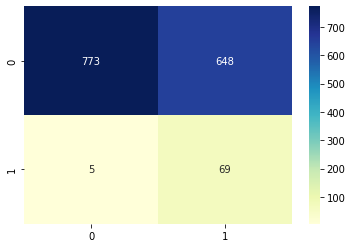

In [35]:
mod = modelo_LGBM_hyper_os
#mod.fit(X_train_os, y_train_os)

y_predict = mod.predict(X_test)
#accuracy del modelo
acc = accuracy_score(y_test, y_predict)
#overfitting
y_pred_train = mod.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)


print("LGBM + hyperparameters (Strategy: Oversampling)")
print()

print(f"Accuaracy: {acc}")
print(f"Accuaracy_train: {acc_train}")
print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
print( "precision score", precision_score(y_test, y_predict, average='macro')) 
print( "recall score", recall_score(y_test, y_predict, average='macro'))
print( "classification_report\n\n", classification_report(y_test, y_predict))   

#Generamos la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict)
print(cnf_matrix)
# Mapa de calor con la matriz de confusión
print(" ")
sns.heatmap(cnf_matrix, annot= True, fmt="g", cmap="YlGnBu")

In [36]:
# Guardamos nuestro mejor modelo. 
## LGBM con hyperparameters se guarda de manera diferente

mod.booster_.save_model('lgbr_hyper_os.txt')
joblib.dump(transformer, 'transformer.pkl')

['transformer.pkl']